In [4]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [5]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

from Scripts import simulation_CLI as cleo

In [66]:
for unitary_seed in range(2):
    initial_pops = [.2,.2, .2, .4, .2, .2, .2, .2]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c5"
    unitary_energy_subspace = 1
    ordering_seed = 1
    chunk_size = 2
    order_rule_name = "mimic"
    num_steps = 100
    data = cleo.execute(file_name="mimic",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="haar2Qunitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

90%
simulation complete, extracting and saving data to : ../data/mimic/mimic-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_mimic
simulation complete, extracting and saving data to : ../data/mimic/mimic-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_mimic
simulation complete, extracting and saving data to : ../data/mimic/mimic-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_mimic
90%
simulation complete, extracting and saving data to : ../data/mimic/mimic-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_mimic
simulation complete, extracting and saving data to : ../data/mimic/mimic-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_mimic
simulation complete, extracting and saving data to : ../data/mimic/mimic-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_mimic


In [67]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/mimic")

In [68]:
#YAYAYAYAY!
#this works now!
def find_lists_with_sublist(list_of_lists_of_lists, sublist_of_lists_to_match):
    matching_lists = []
    scoreboard=[]
    for lists_of_lists in list_of_lists_of_lists:
        score=0
        for pair in sublist_of_lists_to_match:
            for ordered_pair in lists_of_lists:
                if np.array_equal(ordered_pair,[pair[0],pair[1]]) or np.array_equal(ordered_pair,[pair[1],pair[0]]):
                    score= score +1
        list_score = [lists_of_lists,score]
        scoreboard.append(list_score)
    #return scoreboard
    for lists, scores in scoreboard:
        if scores == len(sublist_of_lists_to_match):
            matching_lists.append(lists)
    return matching_lists

In [69]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM
newdata = dict(h5py.File("../data/mimic/mimic.hdf5"))


In [70]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [71]:
twoQdmsmimic = get_2_qbit_dms(newdata,8,"c5","mimic")
popsmimic = get_pops(newdata,8,"c5","mimic")

In [72]:
sizes = [8]
connectivities = ["c5"]
temps = ['cold','hot']
result = {s:{t:{} for t in temps} for s in sizes}
for size in sizes:
    for connectivity in connectivities:
        pops = get_pops(newdata,size,connectivity,"mimic")
        extractable_work_mimic = np.array([[measure.extractable_work_of_each_qubit_from_pops(p) for p in time_slice ]for time_slice in pops ])
        change_in_ex_work_mimic = np.diff(extractable_work_mimic,axis = 1)

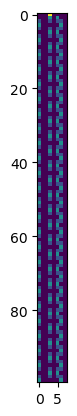

In [73]:
for i in range(1):
    plt.imshow(popsmimic[i], interpolation='none')
    plt.show()

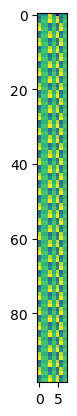

In [74]:
for i in range(1):
    plt.imshow(change_in_ex_work_mimic[i], interpolation='none')
    plt.show()

In [75]:
def extract_total(list_of_lists):
    return [sublist[0] for sublist in list_of_lists]
def extract_stds(list_of_lists):
    return [sublist[1] for sublist in list_of_lists]
def extract_means(list_of_lists):
    return [sublist[2] for sublist in list_of_lists]
def extract_mode(list_of_lists):
    return [sublist[3] for sublist in list_of_lists]

In [76]:
def means_stds_mode_of_pops_of_one_sim_index(pops,trial_index):
    mean_stds_mode_list = []
    for step_index in range(steps):
        total = sum(pops[step_index])
        stds = np.std(pops[step_index])
        means = np.mean(pops[step_index])
        mode = max(pops[step_index])
        mean_stds_mode_list.append([total,stds,means,mode])
    return mean_stds_mode_list

In [77]:
def moving_average(data, window_size=10):
    """
    Function to calculate the moving average of a given data array.
    
    Parameters:
    - data: The input data array.
    - window_size: The size of the moving average window.
    
    Returns:
    - moving_avg: The moving average array.
    """
    moving_avg = np.convolve(data, np.ones(window_size) / window_size, mode='valid')
    return moving_avg
steps = 99
#plot 3 lists a function of time
def plot_total_as_function_of_time(list1):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
     # Calculate moving averages for both lists
    moving_avg_list1 = moving_average(list1)
    #moving_avg_list2 = moving_average(list2)
    #moving_avg_list3 = moving_average(list3)
    
    # Plotting the lists and their moving averages
    plt.plot(time_steps, list1, label='Mimic')
    #plt.plot(time_steps, list2, label='Greedy')
    #plt.plot(time_steps, list3, label='Land_max')    
    plt.plot(time_steps[len(list1) - len(moving_avg_list1):], moving_avg_list1, linestyle='--', color='blue', label='Moving Average (Random)')
    #plt.plot(time_steps[len(list2) - len(moving_avg_list2):], moving_avg_list2, linestyle='--', color='orange', label='Moving Average (Greedy)')
    #plt.plot(time_steps[len(list3) - len(moving_avg_list3):], moving_avg_list3, linestyle='--', color='green', label='Moving Average (Land_max)')
    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title('Total \Delta W on landscape as a function of Time Step')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.show()

def plot_stds_Delta_Wex_as_function_of_time(list1):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
     # Calculate moving averages for both lists
    moving_avg_list1 = moving_average(list1)
    #moving_avg_list2 = moving_average(list2)
    #moving_avg_list3 = moving_average(list3)
    
    # Plotting the lists and their moving averages
    plt.plot(time_steps, list1, label='Random')
    plt.plot(time_steps, list2, label='Greedy')
    plt.plot(time_steps, list3, label='Land_max')    
    plt.plot(time_steps[len(list1) - len(moving_avg_list1):], moving_avg_list1, linestyle='--', color='blue', label='Moving Average (Random)')
    plt.plot(time_steps[len(list2) - len(moving_avg_list2):], moving_avg_list2, linestyle='--', color='orange', label='Moving Average (Greedy)')
    plt.plot(time_steps[len(list3) - len(moving_avg_list3):], moving_avg_list3, linestyle='--', color='green', label='Moving Average (Land_max)')
    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title('Standard deviation of \Delta W on landscape as a function of Time Step')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.show()
def plot_means_Delta_Wex_as_function_of_time(list1, list2,list3):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
    # Calculate moving averages for both lists
    moving_avg_list1 = moving_average(list1)
    moving_avg_list2 = moving_average(list2)
    moving_avg_list3 = moving_average(list3)
    
    # Plotting the lists and their moving averages
    plt.plot(time_steps, list1, label='Random')
    plt.plot(time_steps, list2, label='Greedy')
    plt.plot(time_steps, list3, label='Land_max')    
    plt.plot(time_steps[len(list1) - len(moving_avg_list1):], moving_avg_list1, linestyle='--', color='blue', label='Moving Average (Random)')
    plt.plot(time_steps[len(list2) - len(moving_avg_list2):], moving_avg_list2, linestyle='--', color='orange', label='Moving Average (Greedy)')
    plt.plot(time_steps[len(list3) - len(moving_avg_list3):], moving_avg_list3, linestyle='--', color='green', label='Moving Average (Land_max)')
    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title('Mean \Delta W on landscape as a function of Time Step')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.show()
def plot_mode_Delta_Wex_as_function_of_time(list1, list2,list3):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
     # Calculate moving averages for both lists
    moving_avg_list1 = moving_average(list1)
    moving_avg_list2 = moving_average(list2)
    moving_avg_list3 = moving_average(list3)
    
    # Plotting the lists and their moving averages
    plt.plot(time_steps, list1, label='Random')
    plt.plot(time_steps, list2, label='Greedy')
    plt.plot(time_steps, list3, label='Land_max')    
    plt.plot(time_steps[len(list1) - len(moving_avg_list1):], moving_avg_list1, linestyle='--', color='blue', label='Moving Average (Random)')
    plt.plot(time_steps[len(list2) - len(moving_avg_list2):], moving_avg_list2, linestyle='--', color='orange', label='Moving Average (Greedy)')
    plt.plot(time_steps[len(list3) - len(moving_avg_list3):], moving_avg_list3, linestyle='--', color='green', label='Moving Average (Land_max)')

    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title('Mode of \Delta W on landscape as a function of Time Step')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.show()

In [78]:
tots_mimic=extract_stds(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_mimic,0))
stds_mimic=extract_stds(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_mimic,0))
plot_total_as_function_of_time(tots_mimic)
plot_total_as_function_of_time(stds_mimic)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [79]:
#MI of every pair
def mutual_info_dicts(twoQdms, trial_index):
    mutual_info_list = []
    for time_step in twoQdms[trial_index]:
        mutual_info_dict = {}
        mutual_info = measure.mutual_information_of_every_pair_dict(time_step)
        # Filter out values below the precision threshold
        filtered_mutual_info = {k: v if v >= 1e-6 else 0 for k, v in mutual_info.items()}
        # Update the mutual_info_dict with the filtered mutual info for the current time step
        mutual_info_dict.update(filtered_mutual_info)
        # Append the mutual_info_dict to the list
        mutual_info_list.append(mutual_info_dict)
    return mutual_info_list

In [80]:
# Call the two_point_dict function for each trial index
# Get the list of dictionaries containing two point values for each time step
def create_adjacency_matrix_two_dim(two_point_dict, num_nodes):
    adjacency_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    for (node1, node2), two_point_value in two_point_dict.items():
        adjacency_matrix[node1][node2] = two_point_value
        adjacency_matrix[node2][node1] = two_point_value  # Assuming undirected graph
    return adjacency_matrix

In [81]:
def adjacency_matrices_list_two_dim(twoQdms, trial_index, num_nodes, two_point_dicts):
    # Get the list of dictionaries containing mutual information values for each time step
    two_point_dicts_list = two_point_dicts(twoQdms, trial_index)
    # Create adjacency matrices for each time step
    adjacency_matrices = []
    for two_point_dict in two_point_dicts_list:
        adj_matrix = create_adjacency_matrix_two_dim(two_point_dict, num_nodes)
        adjacency_matrices.append(adj_matrix)
    return adjacency_matrices

In [82]:
num_nodes = 8  # Update this with the actual number of nodes
# Get the list of adjacency matrices
adj_matrices_list_mimic = adjacency_matrices_list_two_dim(twoQdmsmimic,0, num_nodes,mutual_info_dicts)

In [83]:
#Clustering Coefficient
def clustering_coeff_function_of_time(adjacency_matrix_list):
    C_list = []
    for adj_mat in adjacency_matrix_list:
        M_sq = adj_mat@adj_mat
        sum_of_M_sq = np.sum(M_sq)
        M_cube = adj_mat@adj_mat@adj_mat
        M_cube_trace = np.trace(M_cube)
        C_list.append(M_cube_trace/sum_of_M_sq)
    return(C_list)

In [84]:
clustering_mimic = clustering_coeff_function_of_time(np.array(adj_matrices_list_mimic))

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_2235/4264663596.py:9: RuntimeWarning: invalid value encountered in scalar divide
  C_list.append(M_cube_trace/sum_of_M_sq)


In [37]:
#Disparity
def disparity_function_of_time(adjacency_matrix_list, N):
    D_list = []
    for adj_mat in adjacency_matrix_list:
        M_row_sum_squared = np.sum(adj_mat, axis=1)**2
        M_row_sum_of_squared_elements = np.sum(adj_mat**2, axis=1)
        # Check for zero division before performing division
        Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)
        D_list.append(np.sum(Di) / N)
    return D_list

In [38]:
disparity_mimic = disparity_function_of_time(np.array(adj_matrices_list_mimic),8)

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_2235/4019921139.py:8: RuntimeWarning: invalid value encountered in divide
  Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)


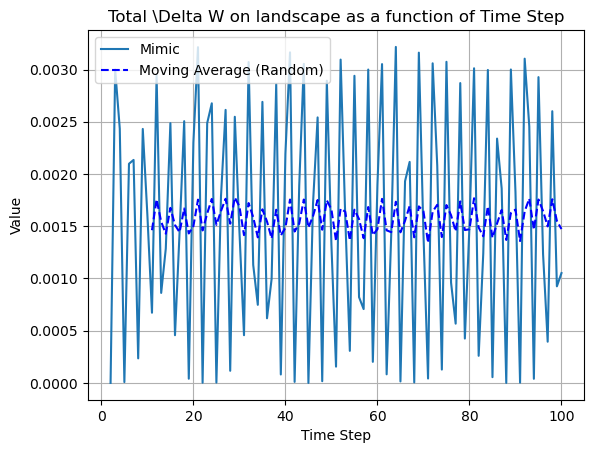

In [39]:
plot_total_as_function_of_time(clustering_mimic)

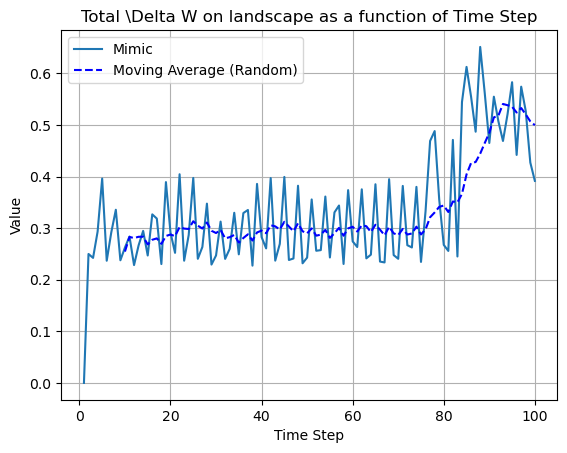

In [40]:
plot_total_as_function_of_time(disparity_mimic)

In [42]:
def change_in_ex_work_mimic_q_index(Q_index): return change_in_ex_work_mimic[0][0:99,Q_index]
def change_in_ex_work_greedy_q_index(Q_index): return change_in_ex_work_greedy[0][0:99,Q_index]
def change_in_ex_work_landmax_q_index(Q_index): return change_in_ex_work_land_maz[0][0:99,Q_index]

In [63]:
steps=98
def tz_two_q_dyns_map(pops_trial_index): 
    tz = []
    np.array(pops_trial_index)
    for step_index in range(steps):
        tzi = pops_trial_index[step_index + 1 ] - np.cos(np.pi / 4)*np.cos(np.pi / 4)* pops_trial_index[step_index]
        tz.append(tzi)
    return tz

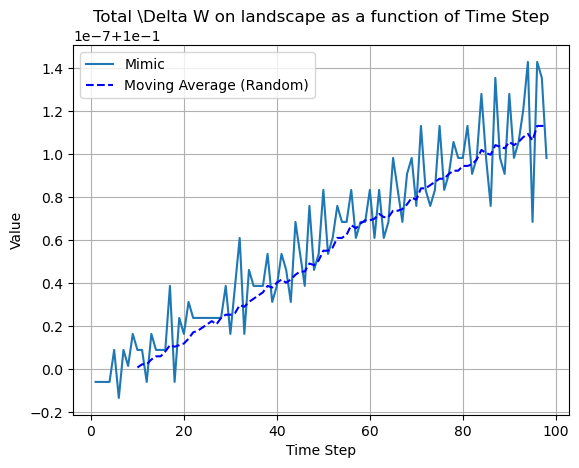

In [64]:
#plot_total_as_function_of_time(extract_stds(means_stds_mode_of_pops_of_one_sim_index(tz_two_q_dyns_map(popsmimic[0]),0)))
plot_total_as_function_of_time(tz_two_q_dyns_map(popsmimic[0][0:99,4]))


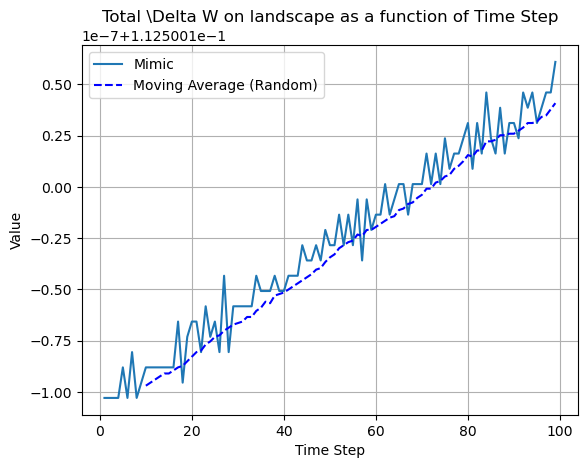

In [50]:
plot_total_as_function_of_time(extract_means(means_stds_mode_of_pops_of_one_sim_index(tz_two_q_dyns_map(popsmimic[0]),0)))